## Pre-Processing & Training

In [1]:
# !pip install category_encoders

In [2]:
# !pip install -U imbalanced-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

from sklearn.decomposition import PCA

#Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.
from sklearn.preprocessing import scale


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Construct a Pipeline from the given estimators.
from sklearn.pipeline import make_pipeline


from sklearn.feature_selection import SelectKBest, f_regression
import datetime


In [4]:
hearts = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\dummies_data.csv")

In [5]:
hearts.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [6]:
hearts['HeartDisease'].value_counts(normalize = True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

91.4% values are no in Heart Disease, whereas only 8.5% are yes. 

We are ready to trian test split with stratification to try and preserve the original skewness, and we will also check if the original proportions of 91.4% No and 8.6% Yes values are preserved in the y_train and y_test set.

In [7]:
X = hearts.drop(['HeartDisease'], axis = 1)
y = hearts['HeartDisease']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 0)

In [9]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((239846, 50), (239846,), (79949, 50), (79949,))

In [10]:
y_test.value_counts(normalize = True)

0    0.914408
1    0.085592
Name: HeartDisease, dtype: float64

In [11]:
y_train.value_counts(normalize = True)

0    0.914403
1    0.085597
Name: HeartDisease, dtype: float64

We can confirm that that values proportions are preserved in the train & test set. 

In [12]:
X_train.dtypes

BMI                                    float64
PhysicalHealth                         float64
MentalHealth                           float64
SleepTime                              float64
Smoking_No                               int64
Smoking_Yes                              int64
AlcoholDrinking_No                       int64
AlcoholDrinking_Yes                      int64
Stroke_No                                int64
Stroke_Yes                               int64
DiffWalking_No                           int64
DiffWalking_Yes                          int64
Sex_Female                               int64
Sex_Male                                 int64
AgeCategory_18-24                        int64
AgeCategory_25-29                        int64
AgeCategory_30-34                        int64
AgeCategory_35-39                        int64
AgeCategory_40-44                        int64
AgeCategory_45-49                        int64
AgeCategory_50-54                        int64
AgeCategory_5

In [13]:
print("\n")
print("X_train:", type(X_train), X_train.shape, len(X_train)) 

print("\n")
print("X_test", type(X_test), X_test.shape, len(X_test)) 

print("\n")
print("y_train", type(y_train), y_train.shape, len(y_train)) 

print("\n")
print("y_test", type(y_test), y_test.shape, len(y_test)) 



X_train: <class 'pandas.core.frame.DataFrame'> (239846, 50) 239846


X_test <class 'pandas.core.frame.DataFrame'> (79949, 50) 79949


y_train <class 'pandas.core.series.Series'> (239846,) 239846


y_test <class 'pandas.core.series.Series'> (79949,) 79949


When we save the y_train and y_test it will save it as a Dataframe. In other words, the shape will look like (239846, 1 ) instead of (239846,) so we will need to convert the y_train and y_test as series.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# AJS: construct the LogisticRegression model
clf = LogisticRegression(max_iter = 500)

# Fit the model on the training data.
clf.fit(X_train, y_train) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test = clf.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test, y_test))


# AJS: also printout the training score
y_predict_training = clf.predict(X_train)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(y_train, y_predict_training))




[Test] Accuracy score (y_predict_test, y_test): 0.9156212085204318


[Training] Accuracy score: (ylr, y_predict_training) 0.9159960974958932


Because our scores have a minimal unit difference we can see that there is no overfitting here. 

In [16]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5481488849141637

Text(0.5, 0, 'False Positive Rate')

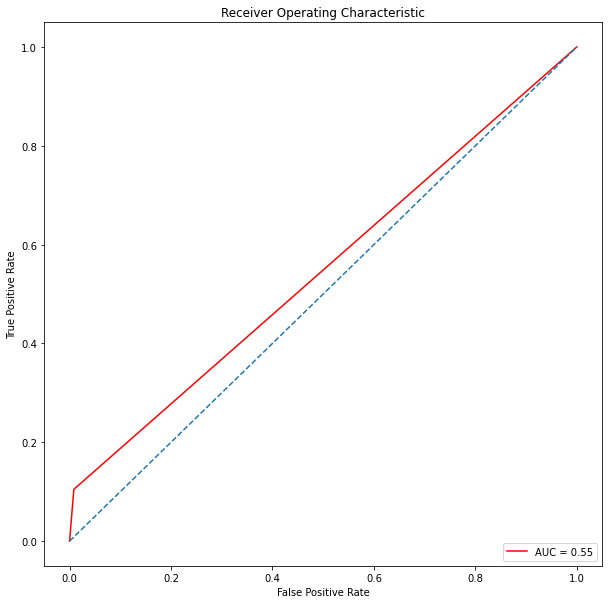

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)

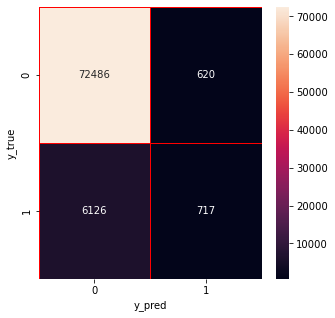

In [19]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


We see that 72486 were given a correct result, however 6126 people who had a disease came out as a negative result which can be considered as bad, along with 620 people who were healthy but were told they had a disease.  

- Precision is a measure of how many of the positive predictions made are correct (true positives)
- Recall: over all the positive cases in the data, how many of the positive cases the classifier correctly predicted. 
- F1-Score is a measure combining both precision and recall.

In [27]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.54      0.10      0.18      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



Almost 55% measures were predicted correctly, however over all the positive cases only 11% were were predicted positively according to the classification report. The numbers between class 0 and class 1 differ significantly and tells us that there is imbalance that we need to take care of.  

Let us use StandardScaler in order to standardize the range of functionality. The idea behind it is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 

In [21]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [22]:
clf.fit(X_train_scaled, y_train)

y_test_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_test_pred, y_test))

0.9155711766250985


In [23]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_test_pred))


 AUC-ROC: 0.5482539833469406


In [24]:
# AJS: use sklearn.metrics.classification_report for a more comprehensive
# performance analysis

#AJS
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.54      0.10      0.18      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



We get the same results as before. The number of correct predictions over all the positive cases are only 11%, a measure that is not good when we are trying to predict the likelihood of a heart disease. 

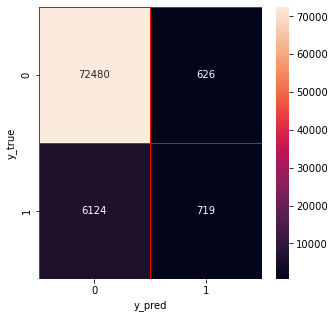

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
# X_train.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\X_train.csv', index = False)
# X_test.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\X_test.csv', index = False)
# y_train.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\y_train.csv', index = False)
# y_test.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\worked on excels\\y_test.csv', index = False)

#### Summary

From the EDA we know that the dataset is imbalanced, with a (91/9)% proportion between the majority class (0 - no heart disease) and the minority class (1 - heart disease). We performed a train/test split using stratification to try to preserve the original skewness. The performance results from the classification report using the test set consistently show large gaps for precision, recall, and f-1 scores between the majority class and the minority class, In particular, a recall of 11% for the minority class means that of all the points which are actually positive, the model was successful in only 11% of the times, which is very low when identifying for a heart disease. A precision of 54% for the minority class means that over all the positive classes (1 - heart disease) only 54% correctly identified as (1- heart disease), again very low. With such a large margin of error, a classifier like this cannot possibly be used for decision-making in practical applications.

In the next notebook, we will first determine which performance metric better captures the business need,
and then will combine resampling techniques with other optimized classification algorithms with the
goal of obtaining a better model with respect to the chosen performance metric."


- We can see that we have imbalance in our target variable hence one value always does very good and the other very bad. 

- Our accuracy score tells us that our model is good but our Roc-auc score tells us that it really is not because most of the values are 0 and are being predicted correctly.

- We do see that we do not have overfitting in our model as our training and test scores are more or less the same. 

- Some of the thing we can expect in the next notebook are over-sampling and under-sampling techinques to work with imbalance, and models like LGBM, XGBoost, and others with the over/under - sampling techniques.  